<a href="https://colab.research.google.com/github/maviverosp/PUC-Rio/blob/main/mnist_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [24]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## Prepare the data

In [25]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


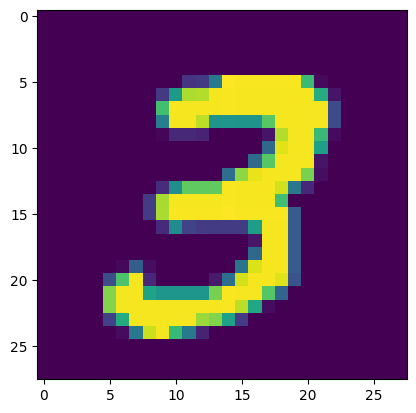

In [26]:

#access first image
first_image = x_train[7]

first_image = np.array(first_image)
pixels = first_image.reshape((28, 28))
plt.imshow(pixels)

## Build the model

In [27]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)             

## Train the model

In [28]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 44s 103ms/step - loss: 1.5471 - accuracy: 0.5107 - val_loss: 0.4875 - val_accuracy: 0.8880
Epoch 2/15
422/422 [==============================] - 46s 108ms/step - loss: 0.5562 - accuracy: 0.8265 - val_loss: 0.2632 - val_accuracy: 0.9307
Epoch 3/15
422/422 [==============================] - 43s 102ms/step - loss: 0.3751 - accuracy: 0.8867 - val_loss: 0.1973 - val_accuracy: 0.9458
Epoch 4/15
422/422 [==============================] - 45s 107ms/step - loss: 0.2995 - accuracy: 0.9098 - val_loss: 0.1653 - val_accuracy: 0.9552
Epoch 5/15
422/422 [==============================] - 45s 106ms/step - loss: 0.2578 - accuracy: 0.9221 - val_loss: 0.1450 - val_accuracy: 0.9620
Epoch 6/15
422/422 [==============================] - 43s 102ms/step - loss: 0.2278 - accuracy: 0.9313 - val_loss: 0.1315 - val_accuracy: 0.9647
Epoch 7/15
422/422 [==============================] - 44s 104ms/step - loss: 0.2106 - accuracy: 0.9370 - val_loss: 0.1201 - val_ac

## Evaluate the trained model

In [29]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08762475103139877
Test accuracy: 0.9721999764442444
